In [201]:

import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [202]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [203]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
df.shape

(42000, 785)

In [205]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33952,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
import matplotlib.pyplot as plt

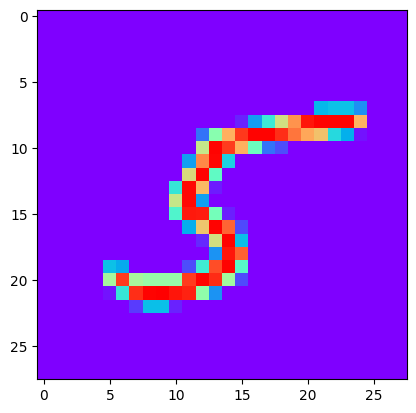

In [207]:
plt.imshow(df.iloc[35200,1:].values.reshape(28,28),cmap="rainbow")

In [208]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [209]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
y

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [212]:
X_train.shape

(33600, 784)

In [213]:
from sklearn.neighbors import KNeighborsClassifier

In [214]:
knn=KNeighborsClassifier()

In [215]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [216]:
y_pred=knn.predict(X_test)

In [217]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [218]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [219]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [220]:
from sklearn.decomposition import PCA
pca=PCA(n_components=200)

In [221]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [222]:
X_train_trf.shape

(33600, 200)

In [223]:
knn=KNeighborsClassifier()

In [224]:
knn.fit(X_train_trf,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [225]:
y_pred=knn.predict(X_test_trf)

In [226]:
accuracy_score(y_test,y_pred)

0.9502380952380952

In [227]:
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_train_trf=pca.transform(X_test)

In [228]:
X_train_trf

array([[-5.00670153, -2.63019042],
       [-7.75779524, -1.47422971],
       [-7.4728587 ,  1.61827862],
       ...,
       [ 2.40771342, -1.5500689 ],
       [10.55731046, -2.46747943],
       [-3.4236928 ,  5.09414981]])

In [229]:
y_train_trf.shape

(8400,)

In [230]:
import plotly.express as px

# Fix shape mismatch and convert labels to string
y_train_trf = y_train[:X_train_trf.shape[0]].values.ravel().astype(str)

# Plot
fig = px.scatter(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1], 
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.show()


In [231]:
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_train_trf=pca.transform(X_test)

In [232]:
import plotly.express as px

# Ensure labels are 1D and match X_train_trf length
y_train_trf = y_train[:X_train_trf.shape[0]].values.ravel().astype(str)

# Create 3D scatter plot with labels as color
fig = px.scatter_3d(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    z=X_train_trf[:, 2],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10,
    labels={'color': 'Digit'}
)

# Optional: tighten margins
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()


In [234]:
# Eigen Values
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459616])

In [235]:
# Eigen Vector
pca.components_

array([[-6.14002723e-19,  1.17091815e-19, -3.01172287e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.26989453e-17,  3.56801910e-18,  1.08348526e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.41595971e-18, -7.79152265e-18, -2.84976862e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [236]:
pca.components_.shape

(3, 784)

In [238]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [240]:
pca.explained_variance_.shape

(784,)

In [244]:
pca.components_.shape

(784, 784)

In [245]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

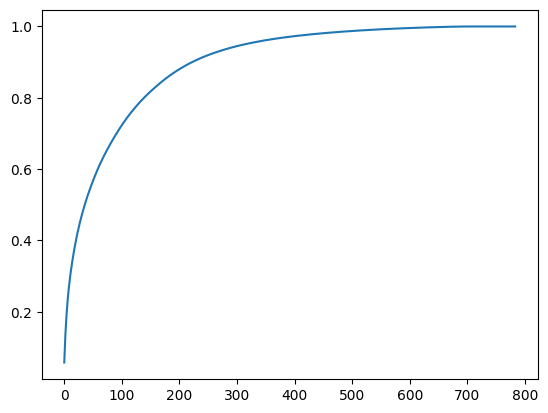

In [246]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))